In [ ]:
from zipfile import ZipFile
file_name = "UTKFace.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [ ]:
path = "/content/UTKFace"
images = []
gender = []
for img in os.listdir(path):
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(np.array(img))
  gender.append(np.array(genders))

In [ ]:
images = np.array(images)   
gender = np.array(gender,np.uint64)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=35)

In [ ]:
gender_model = Sequential()

gender_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(200,200,3)))
gender_model.add(MaxPool2D(pool_size=(3,3), strides=2))

gender_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPool2D(pool_size=(3,3), strides=2))

gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPool2D(pool_size=(3,3), strides=2))

gender_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPool2D(pool_size=(3,3), strides=2))

gender_model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPool2D(pool_size=(3,3), strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.summary()

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gender = gender_model.fit(x_train_gender, y_train_gender, validation_data=(x_test_gender, y_test_gender), epochs=50)

gender_model.save('gender_model_50epochs.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 128)      0

In [ ]:
score = gender_model.evaluate(x_test_gender, y_test_gender, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.45384758710861206
Test accuracy: 0.8884764909744263


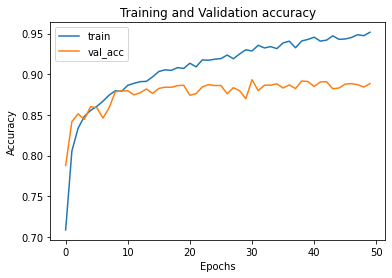

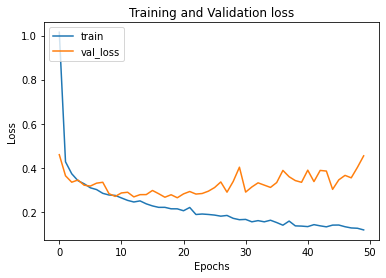

In [ ]:
history = history_gender

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val_acc'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','val_loss'], loc = 'upper left')
plt.show()